In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Observer import TimeEvolutionObserverLog
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Simulation setup

In [44]:
sim = Simulation()
nr_particles = 10**2
nr_steps = 10**5

start simulation


#### Source

In [45]:
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
mfp = np.array([3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13])  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

source


#### Observer

In [46]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 100
observer = TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
sim.add_observer(observer)

observer


#### Propagator

In [47]:
%time sim.run_simulation(nr_steps)
sim.save_data('data')

CPU times: user 6.73 s, sys: 6.14 ms, total: 6.73 s
Wall time: 6.74 s


## Analyze statistics


init statistics plotting class


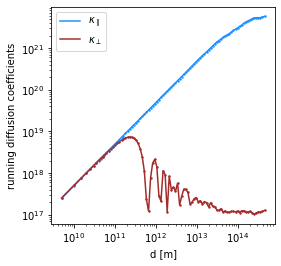

In [48]:
df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)